Автор: Лейман М.А.   
Дата создания: 22.03.2025  

# Задание ZALA  
## 4. Детектирование множества объектов
### Модель __YOLO12n__ .

## Импорты

In [1]:
import time
from glob import glob
import os 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
import torch
from matplotlib import rcParams
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = (14,6)


print('Виртуальное окружение')
!which python 
# Текущее положение
print('\nТекущее положение: ')
path_1 = os.getcwd()
print(path_1)

Виртуальное окружение
/home/maksim/anaconda3/envs/rapids-25.02/bin/python

Текущее положение: 
/home/maksim/develops/python/devsTraining/zala_task


## Проверка GPU

In [2]:
# устанавливаем device если gpu или cpu


if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("работаем на устройстве: ", device)
print('Версия torch:           ', torch.__version__)
print("версия  cuDNN:          ", torch.backends.cudnn.version())

# ПРОВЕРКА GPU
!nvidia-smi

работаем на устройстве:  cuda
Версия torch:            2.6.0+cu124
версия  cuDNN:           90100
Thu Apr 10 12:38:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060        Off |   00000000:01:00.0  On |                  N/A |
| 30%   41C    P8             21W /  170W |    2662MiB /  12288MiB |     39%      Default |
|                                         

In [3]:
# Получаем текущую директорию
path_dir = os.getcwd()
print("Текущая директория:", path_dir)

DATA_DIR = os.path.abspath(os.path.join(path_dir, 'dataset'))
print("Путь к dataset:", DATA_DIR)



Текущая директория: /home/maksim/develops/python/devsTraining/zala_task
Путь к dataset: /home/maksim/develops/python/devsTraining/zala_task/dataset


## Обучение

### Yolo

In [4]:
from glob import glob
import os
import numpy as np
from IPython.display import clear_output
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from tqdm import tqdm_notebook
import torch.nn.functional as F
from torchvision import models

import time
from matplotlib import rcParams
import torch

# np.random.seed(42)
#set_global_seed(42)

In [5]:
from ultralytics import YOLO

# model = YOLO("models/yolo12n.pt")  
model = YOLO("models/12n_best_UAVOD1.pt")
# model = YOLO("models/12n_best_DOTA.pt")


# ['auto', 'Adam', 'SGD', 'AdamW', 'Adamax', 'NAdam', 'RAdam']

In [ ]:
model.half();

torch.cuda.empty_cache()

for opt in ['AdamW']:
    for mosaic in [1.0]:
        for lr00 in [0.0001]:
            for iou0 in [0.5]:
                for batch in [8]:
                    # Очистка экрана перед каждой новой тренировкой
                    os.system('cls' if os.name == 'nt' else 'clear') 
                    clear_output(wait=True)  

                    print(f"Запуск тренировки: opt={opt}, batch={batch}, mosaic={mosaic}, lr0={lr00}, iou={iou0}")
                    
                    model.train(
                        data="data_1.yaml",
                        epochs=20,
                        imgsz=736,
                        batch=batch,
                        device="cuda",
                        lr0=lr00,
                        lrf=0.01,
                        cos_lr=True,
                        momentum=0.951,
                        weight_decay=0.001,
                        optimizer=opt,
                        cache=None,
                        max_det=101,            # максимальное количество детектируемых объектов        
                        single_cls=False,
                        patience=20,
                        verbose=True,
                        dropout=0.2,
                        freeze=0,
                        iou=iou0,  
                        half=True,          # 16-битная (FP16) арифметика
                        workers=0,
                        mosaic=mosaic,
                        close_mosaic=10,
                        multi_scale=False,  # разные размеры
                        mixup=0.2,          # Смешивание изображений в одно
                        copy_paste=0.2,     # Вставка объекта с другого изображения    
                        scale=0.2,             
                        val=True,
                        plots=True,
                        amp= True,          # Смешанная точность
                        fraction=1.0,       # используемая доля обучающих данных

                        
                        
                    )

                    time.sleep(1) 


Запуск тренировки: opt=AdamW, batch=8, mosaic=1.0, lr0=0.0001, iou=0.5
New https://pypi.org/project/ultralytics/8.3.105 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)
engine/trainer: task=detect, mode=train, model=models/12n_best_UAVOD1.pt, data=data_1.yaml, epochs=20, time=None, patience=20, batch=8, imgsz=720, save=True, save_period=-1, cache=None, device=cuda, workers=0, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=0, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.5, max_det=101, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nm

train: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/dataset_UAVOD/datasets_split/labels/train.cache... 627 images, 41 backgrounds, 0 corrupt: 100%|██████████| 627/627 [00:00<?, ?it/s]
val: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/dataset_UAVOD/datasets_split/labels/val.cache... 101 images, 6 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:00<?, ?it/s]

Plotting labels to runs/detect/train/labels.jpg... 


optimizer: AdamW(lr=0.0001, momentum=0.951) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.001), 119 bias(decay=0.0)
Image sizes 736 train, 736 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.48G      1.558      1.023      1.063         92        736: 100%|██████████| 79/79 [00:30<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all        101       2180      0.509      0.281      0.336      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.48G      1.432     0.9122      1.032        151        736: 100%|██████████| 79/79 [00:29<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        101       2180      0.736      0.642      0.678      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       4.5G      1.401     0.8759       1.01         76        736: 100%|██████████| 79/79 [00:29<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        101       2180      0.752       0.62      0.668      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.33G      1.424     0.8983      1.018         56        736: 100%|██████████| 79/79 [00:29<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]

                   all        101       2180      0.744      0.664      0.683      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.33G       1.36     0.8355     0.9951         33        736: 100%|██████████| 79/79 [00:29<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        101       2180      0.782      0.628      0.685      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.34G      1.366     0.8313          1         34        736: 100%|██████████| 79/79 [00:29<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]

                   all        101       2180      0.763      0.633      0.681      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.36G      1.356     0.8409     0.9914         53        736: 100%|██████████| 79/79 [00:29<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        101       2180      0.831      0.605      0.674       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.37G       1.35     0.8181     0.9976        156        736: 100%|██████████| 79/79 [00:28<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]

                   all        101       2180      0.791      0.624      0.682      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.37G      1.337     0.8127     0.9891        132        736: 100%|██████████| 79/79 [00:28<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        101       2180      0.791      0.633      0.686      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.37G      1.341     0.8053     0.9902        100        736: 100%|██████████| 79/79 [00:29<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        101       2180      0.776      0.637      0.686       0.47


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      5.37G      1.143     0.6452     0.9206         13        736: 100%|██████████| 79/79 [00:25<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]

                   all        101       2180      0.733      0.666       0.69      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.37G      1.136     0.6286     0.9177        124        736: 100%|██████████| 79/79 [00:25<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]

                   all        101       2180      0.764      0.656      0.696      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.37G      1.115     0.6204     0.9192        108        736: 100%|██████████| 79/79 [00:25<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        101       2180      0.754      0.677      0.702      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.37G      1.119     0.6132     0.9134         60        736: 100%|██████████| 79/79 [00:25<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        101       2180      0.788      0.649      0.699      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.37G      1.097     0.6013     0.9061         41        736: 100%|██████████| 79/79 [00:25<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        101       2180      0.781      0.656      0.702      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.37G      1.098     0.5985     0.9109         34        736: 100%|██████████| 79/79 [00:25<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        101       2180      0.766       0.67      0.701      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.37G      1.098     0.5956     0.9113        185        736: 100%|██████████| 79/79 [00:25<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        101       2180      0.783      0.667      0.706      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.37G      1.083      0.592     0.9077        468        736: 100%|██████████| 79/79 [00:25<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]

                   all        101       2180      0.772      0.658      0.707      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.37G      1.078     0.5869     0.9029         39        736: 100%|██████████| 79/79 [00:25<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        101       2180      0.754      0.664      0.706      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.39G      1.077     0.5856     0.9059         69        736: 100%|██████████| 79/79 [00:25<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]

                   all        101       2180      0.768      0.658      0.706      0.491



20 epochs completed in 0.167 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)
YOLOv12n summary (fused): 159 layers, 2,558,678 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]


                   all        101       2180      0.785      0.667      0.707      0.492
              building         82       1532      0.833      0.883      0.901      0.606
 cultivation-mesh-cage          7         40      0.783      0.902      0.879      0.721
             landslide          2          3      0.489      0.667      0.667      0.551
                  pool          6         10      0.712        0.9       0.91      0.701
   prefabricated-house         50        269      0.868      0.796      0.844      0.549
                quarry         11         13        0.9      0.691      0.758        0.6
                  ship         18        118      0.605      0.441      0.449      0.221
               vehicle         34         91          1       0.13      0.287      0.115
                  well         34        104      0.874      0.596      0.667      0.362
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect

## Первая итерация обучения 
### На начальном датасете  __UAVOD__  844 изображения.
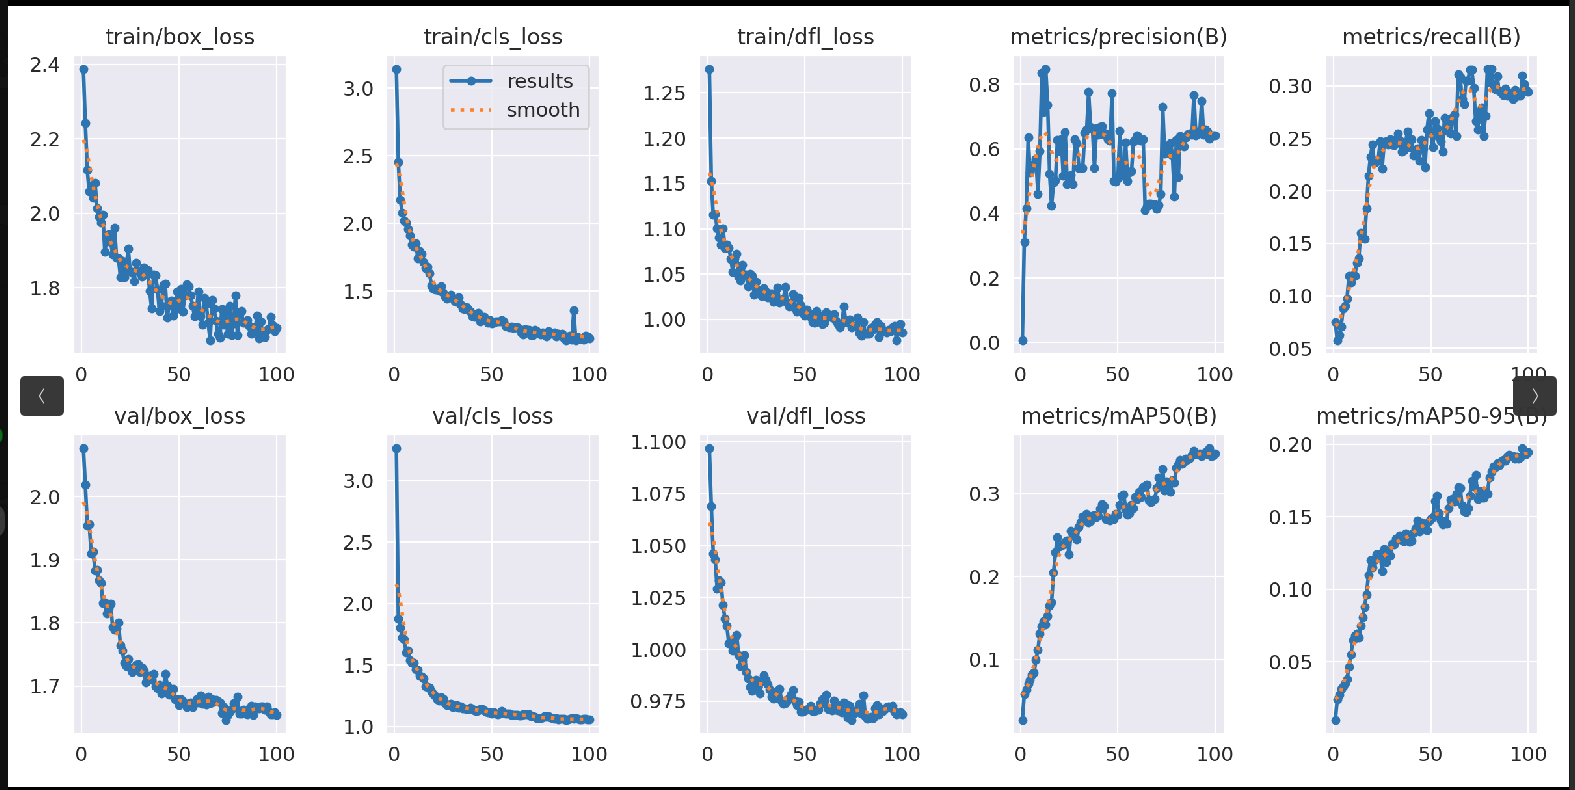


### На увеличенном датасете  __UAVOD__  12000 изображений.  
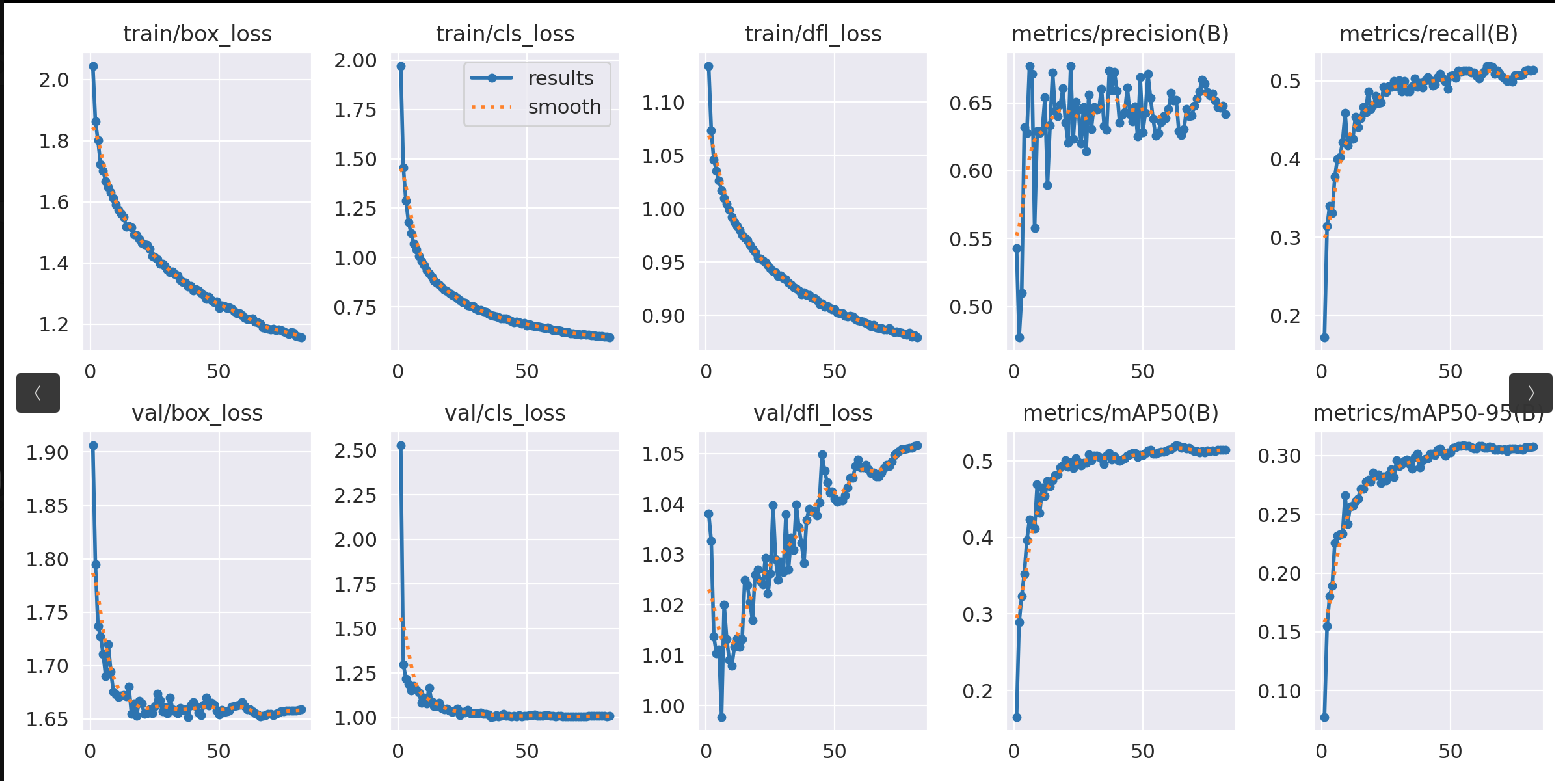


In [7]:
def metrics_model(model, split="test", iou=0.5):
    metrics = model.val(data="data_1.yaml", split=split, iou=iou)
    precision = metrics.box.p.mean().item()     # Precision
    recall = metrics.box.r.mean().item()        # Recall
    map50 = metrics.box.map50.mean().item()     # AP50 (IoU=0.5)
    map50_95 = metrics.box.maps.mean().item()   # mAP50-95

    print("\n=== Итоговые метрики по тестовому набору ===")
    print(f"Средняя точность (Precision): {precision:.3f}")
    print(f"Средняя полнота (Recall): {recall:.3f}")
    print(f"Средняя AP50 (IoU={iou:.2f}): {map50:.3f}")
    print(f"Средний mAP50-95: {map50_95:.3f}")

In [8]:
metrics_model(model, split="test", iou=0.5)

Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)
YOLOv12n summary (fused): 159 layers, 2,558,678 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/dataset_UAVOD/datasets_split/labels/test.cache... 109 images, 7 backgrounds, 0 corrupt: 100%|██████████| 109/109 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]


                   all        109       2183      0.838      0.744      0.788      0.528
              building         75       1595       0.86      0.787      0.841      0.555
 cultivation-mesh-cage         10         36      0.861      0.861      0.854      0.601
             landslide          3          4      0.833          1      0.995      0.809
                  pool          5          8       0.86          1      0.995       0.69
   prefabricated-house         58        295      0.781      0.807      0.785        0.5
                quarry         11         14      0.818      0.929      0.921      0.745
                  ship         20         87      0.816      0.612      0.676      0.325
               vehicle         22         59       0.94      0.169      0.367      0.187
                  well         31         85      0.775      0.529      0.659      0.337
Speed: 0.2ms preprocess, 6.8ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect

### Итоги обучения. Метрики на тестовом наборе.

=== Итоговые метрики по тестовому набору UAVOD __начальный dataset__ ===    100 Эпох.  
Средняя точность (Precision): 0.439  
Средняя полнота (Recall): 0.364  
Средняя AP50 (IoU=0.50): 0.345  
Средний mAP50-95: 0.186  

=== тоговые метрики  по тестовому набору  UAVOD __full_dataset__ ===  Обучение прервалось на 82 Эпохе.  
Средняя точность (Precision): 0.705  
Средняя полнота (Recall): 0.462  
Средняя AP50 (IoU=0.50): 0.513  
Средний mAP50-95: 0.284  


=== Итоговые метрики по тестовому набору UAVOD __full_dataset__ ===    5 Эпох.   После применения __mixup__  и  __copy_paste__ увеличенный размер изображений (640)   
Средняя точность (Precision): 0.843  
Средняя полнота (Recall): 0.611  
Средняя AP50 (IoU=0.50): 0.687  
Средний mAP50-95: 0.447  


=== Итоговые метрики по тестовому набору ===  2  
Средняя точность (Precision): 0.838  
Средняя полнота (Recall): 0.744  
Средняя AP50 (IoU=0.50): 0.788  
Средний mAP50-95: 0.528  

In [10]:
metrics_model(model, split="test", iou=0.5)

Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)


val: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/dataset_UAVOD/datasets_split/labels/test.cache... 91 images, 6 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.26it/s]


                   all         91       2281      0.558      0.367      0.337      0.178
              building         70       1625      0.476      0.678       0.57      0.258
 cultivation-mesh-cage          5         10      0.226        0.7      0.665       0.46
             landslide          2          5          0          0     0.0064    0.00128
                  pool          8          8          1      0.605      0.721      0.416
   prefabricated-house         44        185      0.487      0.692      0.604      0.308
                quarry          6          7      0.384      0.537      0.252     0.0912
                  ship         20        323      0.451     0.0916      0.165     0.0473
               vehicle         15         56          1          0     0.0136    0.00581
                  well         25         62          1          0      0.033     0.0133
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect

In [3]:
model.info()


YOLOv12n summary: 272 layers, 2,569,998 parameters, 0 gradients, 6.5 GFLOPs


(272, 2569998, 0, 6.489497599999999)